In [1]:
import pandas as pd # used to analyze data
import numpy as np # domain of linear algebra, fourier transform, and matrices
from matplotlib import pyplot as plt # creating static, animated, and interactive visualizations

import warnings as wr
wr.filterwarnings('ignore') # overriding/suppress warnings

In [2]:
df = pd.read_csv(r'C:\Users\msalm\Downloads\Height-Weight Data.csv') # Read an Excel file data into a pandas DataFrame

In [3]:
df.head() # the first n (n=5 is default) rows for the object based on position

,Height,Weight
0,73.847017,241.893563
1,68.781904,162.310473
2,74.110105,212.740856
3,71.730978,220.042470
4,69.881796,206.349801


In [4]:
# a tuple representing the dimensionality of the DataFrame that tells the number of rows and cols of a given DataFrame
df.shape

(3501, 2)

Text(0.5, 1.0, 'Height-Weight Table')

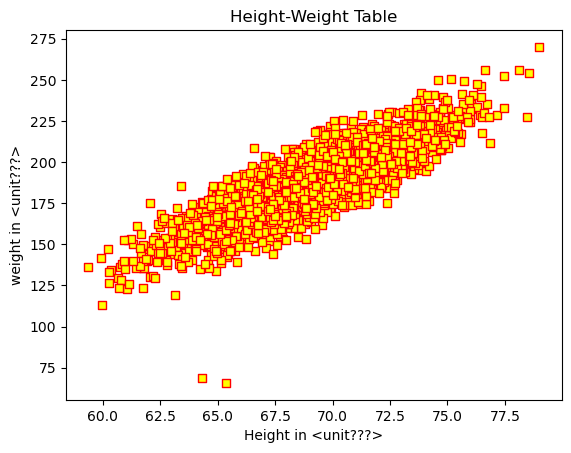

In [5]:
# horizontal and vertical axis in the attempt to show how much one variable is affected by another
# plots one dot for each observation (relationship between variables...dots to represent the relationship between them)
plt.scatter(df.Height, df.Weight, color='yellow', marker='s', edgecolor = 'red') 
plt.xlabel('Height in <unit???>') # label text and contains the string value.
plt.ylabel('weight in <unit???>') # label text and contains the string value.
plt.title('Height-Weight Table') # specify title of the visualization depicted 

In [6]:
# removes the specified row or column... whether to drop labels from the index (0 or ‘index’) or columns (1 or ‘columns’).
x = df.drop('Weight', axis=1) 
y = df[['Weight']]

In [7]:
x.head() # the first n (n=5 is default) rows for the object based on position

,Height
0,73.847017
1,68.781904
2,74.110105
3,71.730978
4,69.881796


In [8]:
y.head() # the first n (n=5 is default) rows for the object based on position

,Weight
0,241.893563
1,162.310473
2,212.740856
3,220.042470
4,206.349801


In [9]:
y.shape # size of dataframe/series which is equivalent to total number of elements.

(3501, 1)

In [10]:
x.mean() # the mean of the values over the requested axis.

Height    69.024411
dtype: float64

In [11]:
y.mean() # the mean of the values over the requested axis.

Weight    186.891258
dtype: float64

In [12]:
from sklearn.model_selection import train_test_split

In [13]:
# Split arrays or matrices into random train and test subset
train, test = train_test_split(df, test_size=.25) #testing data=25% ... between 0.0 & 1.0 and represent proportion of dataset

In [14]:
train.shape # size of dataframe/series which is equivalent to total number of elements.

(2625, 2)

In [15]:
test.shape # size of dataframe/series which is equivalent to total number of elements. 

(876, 2)

In [16]:
train.head() # the first n (n=5 is default) rows for the object based on position

,Height,Weight
2731,72.247325,193.511695
1048,71.064105,200.684160
1161,68.243002,186.423198
212,72.394480,208.436509
1792,68.829216,200.330819


# Seperate

In [17]:
xtrain, xtest, ytrain, ytest = train_test_split(x,y, test_size=.25, random_state=0) #testing data=25%

In [18]:
xtrain.head() # the first n (n=5 is default) rows for the object based on position

,Height
1310,67.847749
3153,65.215556
3333,63.873409
1002,69.156982
1765,68.503261


In [19]:
ytrain.head() # the first n (n=5 is default) rows for the object based on position

,Weight
1310,153.031321
3153,174.931143
3333,152.554620
1002,206.515190
1765,193.982059


In [20]:
#df[1:45]

# Linear Regression

In [21]:
# if the desired output consists of one or more continuous variables, then the task is called regression.
# example: the prediction of the length of a salmon as a function of its age and weight.
# https://scikit-learn.org/stable/supervised_learning.html#supervised-learning
from sklearn.linear_model import LinearRegression

In [22]:
# Linear regression is defined as the process of determining the straight line that best fits a set of dispersed data points
# The line can then be projected to forecast fresh data points. Because of its simplicity and essential features
# Linear regression is used to predict the value of a variable based on the value of another variable.
'''The variable we want to predict is called the dependent variable and variable we are using to predict 
is called the independent variable. '''
lr = LinearRegression()

In [23]:
# The 'fit' method trains the algorithm on the training data, after the model is initialized.
# fit method uses the training data as an input to train the machine learning model.
lr.fit(xtrain, ytrain) # training the model

LinearRegression()

In [24]:
m = lr.coef_ # Attributes- estimated coefficients for the linear regression problem
m

array([[5.96613032]])

In [25]:
c = lr.intercept_ # Attributes - independent term in the linear model
c

array([-224.98706384])

In [26]:
yp = (m*1800) + c # y = mx + c
yp

array([[10514.04751617]])

In [27]:
yp = (m*2200) + c # y = mx + c
yp

array([[12900.49964506]])

In [28]:
lr.predict([[2200]]) # Predicts an Output

array([[12900.49964506]])

In [29]:
x.head() # the first n (n=5 is default) rows for the object based on position

,Height
0,73.847017
1,68.781904
2,74.110105
3,71.730978
4,69.881796


In [30]:
df['predicted_weight'] = lr.predict(x)
df.head() # the first n (n=5 is default) rows for the object based on position

,Height,Weight,predicted_weight
0,73.847017,241.893563,215.593864
1,68.781904,162.310473,185.374740
2,74.110105,212.740856,217.163483
3,71.730978,220.042470,202.969301
4,69.881796,206.349801,191.936837


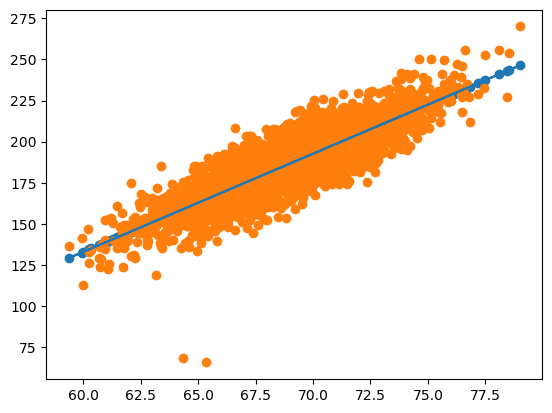

In [31]:
plt.plot(x, df[['predicted_weight']])      # plt.plot(x.squeeze(), df[['predicted_weight']])
# plot data points on horizontal and vertical axis in the attempt to show how much one variable is affected by another.
plt.scatter(x, df[['predicted_weight']])
plt.scatter(x, df[['Weight']])

In [32]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [33]:
# Mean squared error regression loss ... output is non-negative floating point. The best/perfect value is 0.0.
mse = mean_squared_error(ytest, lr.predict(xtest))
# Mean absolute error regression loss... output is non-negative floating point. The best/perfect value is 0.0.
mae = mean_absolute_error(ytest, lr.predict(xtest))

In [34]:
mae

8.145588569833935

In [35]:
mse

103.70875574105973

In [36]:
# coefficient of determination of the prediction.
lr.score(xtest, ytest)

0.7400625947962998

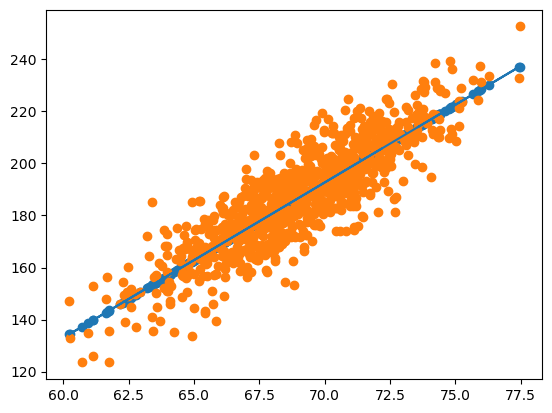

In [37]:
plt.plot(xtest, lr.predict(xtest))      # plt.plot(x.squeeze(), df[['predicted_weight']])
plt.scatter(xtest, lr.predict(xtest))
#plt.scatter(x, df[['weight']])
plt.scatter(xtest, ytest)